In [2]:
#know your data
import pandas as pd
data=pd.read_csv('IRIS.csv')
print(data.shape)
data.head()

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

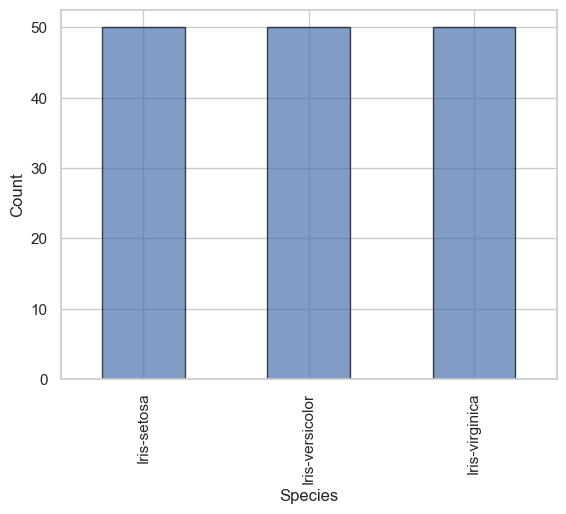

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
a=data.species.value_counts().plot(kind='bar',alpha=0.7, edgecolor='black', color='b')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [11]:
#checking for null values
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

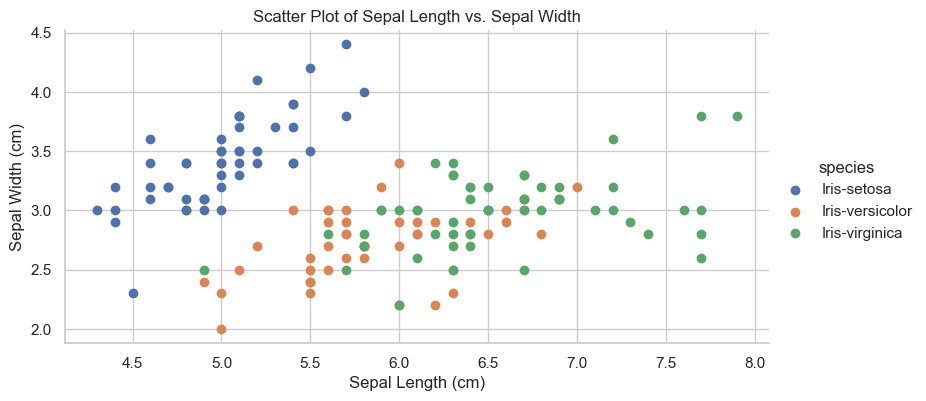

In [34]:
import seaborn as sns

sns.set(style="whitegrid")
sns.FacetGrid(data, hue="species", height=4, aspect=2).map(plt.scatter, "sepal_length", "sepal_width").add_legend()
plt.title('Scatter Plot of Sepal Length vs. Sepal Width')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.show()

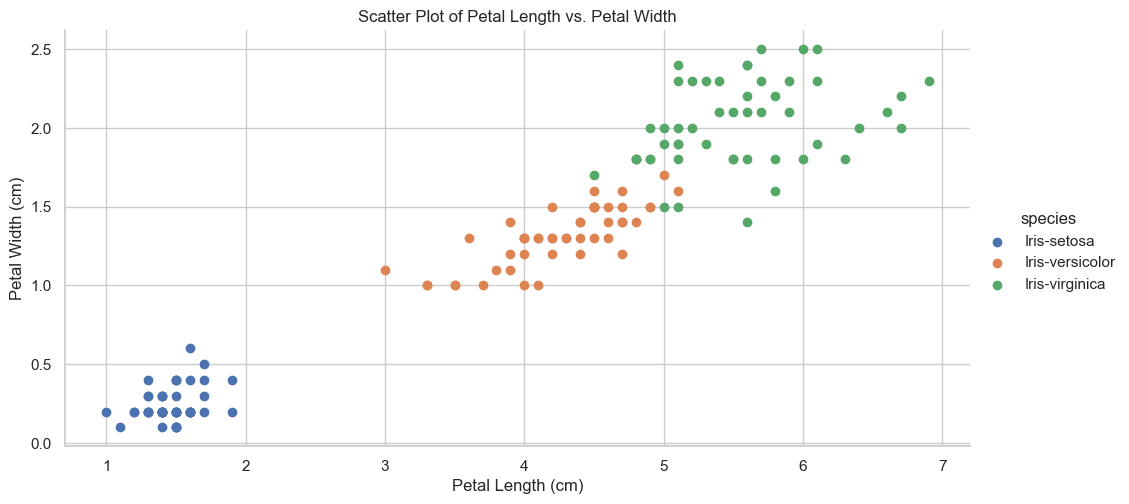

In [31]:
sns.set(style="whitegrid")
sns.FacetGrid(data, hue="species", height=5, aspect=2).map(plt.scatter, "petal_length", "petal_width").add_legend()
plt.title('Scatter Plot of Petal Length vs. Petal Width')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.show()

In [23]:
data.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


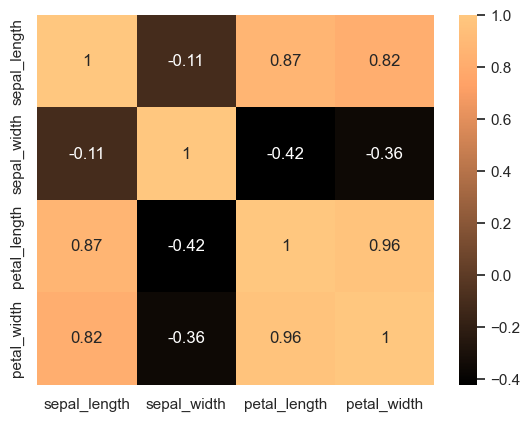

In [26]:
#correlation graphs
sns.heatmap(data.corr(numeric_only=True), cmap="copper", annot = True)
plt.show()

In [35]:
#Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

x=data.drop(columns=['species'])
y=data.species
print(x.head())
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=.30, random_state=42)
print(x_train.shape)
print(x_test.shape)

(105, 4)
(45, 4)


In [53]:
model=RandomForestClassifier(random_state=42)
model.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [54]:
y_pred=model.predict(x_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [55]:
x.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

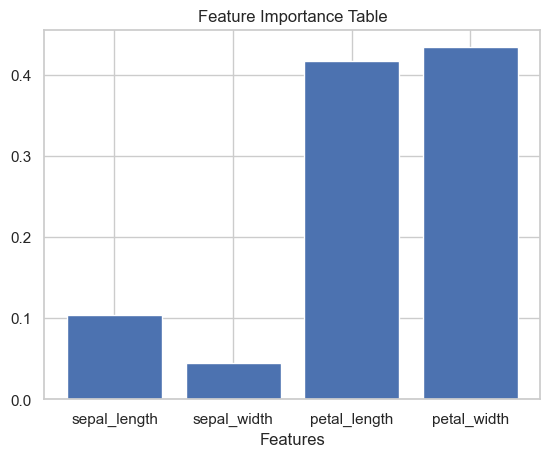

In [56]:
#Feature Importance in the algorithm
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(x.columns)),model.feature_importances_,tick_label=x.columns)
plt.xlabel('Features')
plt.title('Feature Importance Table')
plt.show()

In [57]:
from sklearn.metrics import accuracy_score
print("Accuracy=",accuracy_score(y_test,y_pred))

Accuracy= 1.0


In [58]:
#score on training data
model.score(x_train,y_train)

1.0

In [59]:
#score on testing data
model.score(x_test,y_test)

1.0